In [1]:
using Revise

In [2]:
import LinearAlgebra as LA
import SparseArrays as SA
import Plots
using LaTeXStrings
import QuantumOptics as QO

using FFTW:ifft, fft, fftshift, fftfreq

In [32]:
repo_path = "/local/lmseifert/Other/shaken_lattice_qoc/"
src_path = repo_path * "src/"
include(src_path * "system.jl")
include(src_path * "primitives.jl")
include(src_path * "primitives_utils.jl")

ket_to_basis (generic function with 1 method)

In [4]:
V = 10. #10.
p_max = 5
system = ShakenLatticeSystem1D(V, p_max; bloch_basis=false)
mid = system.params[:mid]
dim = system.params[:dim]

11

In [5]:
system.params[:bloch_energies]

11-element Vector{Float64}:
  -2.1530783420409128
   3.492474366750998
   5.613041084883586
  16.194837348739163
  16.227316189180794
  36.08943757988043
  36.089470356042895
  64.05000409042903
  64.05000409773272
 100.17324661420041
 100.17324661420096

In [6]:
nb, Bb, TnB = coarse_setup(system)

(nBasis{Int64}([11], 5, 11), BlochBasis{Int64}([11], 5, 11), Operator(dim=11x11)
  basis left:  nBasis{Int64}([11], 5, 11)
  basis right: BlochBasis{Int64}([11], 5, 11)
     3.1e-6-0.0im   -1.16278e-5-0.0im  …      0.61515+0.0im
 0.00012667-0.0im  -0.000448867-0.0im      -0.0426291-0.0im
 0.00334874-0.0im    -0.0108523-0.0im      0.00166263+0.0im
  0.0509792-0.0im     -0.140664-0.0im     -4.94193e-5-0.0im
   0.366823-0.0im     -0.692889-0.0im      1.28654e-6+0.0im
   0.851858+0.0im      1.72e-15-0.0im  …  -7.30874e-8-0.0im
   0.366823-0.0im      0.692889+0.0im      1.64202e-6+0.0im
  0.0509792-0.0im      0.140664-0.0im     -6.30942e-5-0.0im
 0.00334874-0.0im     0.0108523-0.0im      0.00212269+0.0im
 0.00012667-0.0im   0.000448867-0.0im       -0.054425-0.0im
     3.1e-6-0.0im    1.16278e-5-0.0im  …     0.785369+0.0im)

In [7]:
pb = pBasis(nb, 50)

pBasis{Int64}([550], 11, 550, 50)

In [291]:
t_free = 1.5
dt = 0.01
ts_free = collect(dt:dt:t_free)

150-element Vector{Float64}:
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1
 0.11
 0.12
 0.13
 ⋮
 1.39
 1.4
 1.41
 1.42
 1.43
 1.44
 1.45
 1.46
 1.47
 1.48
 1.49
 1.5

In [292]:
Ufree = free_propagator_action_p(pb, ts_free, V)

ActionGate(var"#action#358"{pBasis{Int64}, Vector{Float64}, QuantumOpticsBase.Operator{QuantumOpticsBase.MomentumBasis{-11, 11, Int64, Int64}, QuantumOpticsBase.MomentumBasis{-11, 11, Int64, Int64}, Matrix{ComplexF64}}}(pBasis{Int64}([550], 11, 550, 50), [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1  …  1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5], Operator(dim=550x550)
  basis: Momentum(pmin=-11, pmax=11, N=550)
 121.0-0.0im      0.0+0.0im      0.0+0.0im  …      0.0+0.0im      0.0+0.0im
   0.0+0.0im  120.122-0.0im      0.0+0.0im         0.0+0.0im      0.0+0.0im
   0.0+0.0im      0.0+0.0im  119.246-0.0im         0.0+0.0im      0.0+0.0im
   0.0+0.0im      0.0+0.0im      0.0+0.0im         0.0+0.0im      0.0+0.0im
   0.0+0.0im      0.0+0.0im      0.0+0.0im         0.0+0.0im      0.0+0.0im
   0.0+0.0im      0.0+0.0im      0.0+0.0im  …      0.0+0.0im      0.0+0.0im
   0.0+0.0im      0.0+0.0im      0.0+0.0im         0.0+0.0im      0.0+0.0im
   0.0+0.0im      0.0+0.

In [316]:
g = RZ(Bb, 2, 0.7pi)

OpGate(Operator(dim=11x11)
  basis: BlochBasis{Int64}([11], 5, 11)
 1.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  1.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     1.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  1.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  1.0+0.0im, "RZ(2.2)(3,4)", 0.0)

In [317]:
circ = Circuit([Ufree, g, Ufree, g, Ufree])

 - free_p - RZ(2.2)(3,4) - free_p - RZ(2.2)(3,4) - free_p - 

In [318]:
function gaussian_momentum(p, sigma)
    return (sigma^2*pi)^(-1/4) * exp.(-p.^2/(2*sigma^2))
end

gaussian_momentum (generic function with 1 method)

In [319]:
function momentum_comb(p, v, sigma)
    l = div(length(v),2)
    ns = -l:l
    return gaussian_momentum(p*ones(1,length(ns)) - 2*ones(length(p))*ns', sigma) * v * (1. + 0. * 1im)
end

momentum_comb (generic function with 1 method)

In [320]:
psi0_ = QO.basisstate(Bb, 4)
v = ket_to_basis(nb, psi0_; TnB=TnB).data
psi0 = QO.Ket(pb, momentum_comb(QO.samplepoints(pb), v, 0.2));

In [328]:
psi0 = ket_to_basis(pb, psi0_; TnB=TnB)

Ket(dim=550)
  basis: pBasis{Int64}([550], 11, 550, 50)
   1.93004487133e-5 + 0.0im
   1.93004487133e-5 + 0.0im
   1.93004487133e-5 + 0.0im
   1.93004487133e-5 + 0.0im
   1.93004487133e-5 + 0.0im
   1.93004487133e-5 + 0.0im
   1.93004487133e-5 + 0.0im
   1.93004487133e-5 + 0.0im
   1.93004487133e-5 + 0.0im
   1.93004487133e-5 + 0.0im
   1.93004487133e-5 + 0.0im
   1.93004487133e-5 + 0.0im
   1.93004487133e-5 + 0.0im
                    ⋮
 -1.930044871329e-5 + 0.0im
 -1.930044871329e-5 + 0.0im
 -1.930044871329e-5 + 0.0im
 -1.930044871329e-5 + 0.0im
 -1.930044871329e-5 + 0.0im
 -1.930044871329e-5 + 0.0im
 -1.930044871329e-5 + 0.0im
 -1.930044871329e-5 + 0.0im
 -1.930044871329e-5 + 0.0im
 -1.930044871329e-5 + 0.0im
 -1.930044871329e-5 + 0.0im
 -1.930044871329e-5 + 0.0im

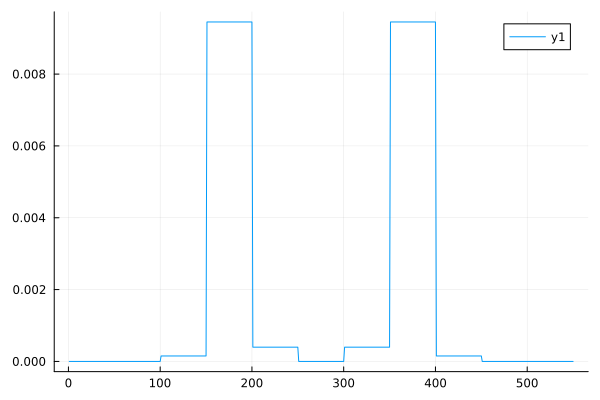

In [329]:
Plots.plot(abs2.(psi0.data))

In [330]:
ts, psis = rollout(circ, psi0, pb; TnB=TnB);

 - free_p - RZ(2.2)(3,4) - free_p - RZ(2.2)(3,4) - free_p - 

In [331]:
mb = QO.MomentumBasis(pb)
xb = QO.PositionBasis(mb)
xs = QO.samplepoints(xb)
Txp = QO.transform(xb, mb)

FFTOperators(dim=550x550)
  basis left:  Position(xmin=-78.53981633974483, xmax=78.53981633974483, N=550)
  basis right: Momentum(pmin=-11, pmax=11, N=550)

In [332]:
psis_x = [Txp * QO.Ket(mb, psi.data) for psi in psis];

In [333]:
pops_xt = hcat([abs2.(psi_x.data) for psi_x in psis_x]...);

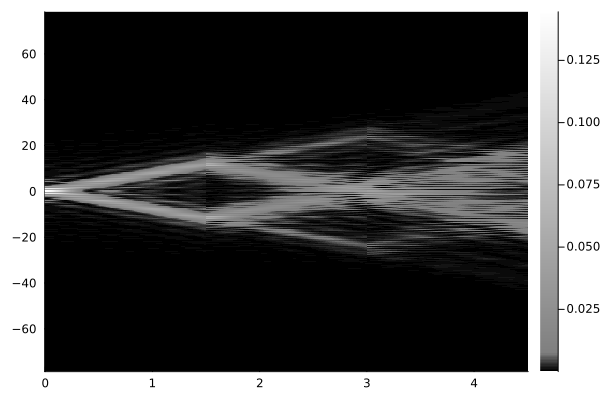

In [334]:
Plots.heatmap(ts, xs, pops_xt, c=Plots.cgrad([:black, :white], [0.05]))